# Neural Net Investigations

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError

from sklearn.ensemble import RandomForestRegressor

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Helper Functions

In [10]:
def Plot_NN(model1):
  fig, ax = plt.subplots(nrows = 2, ncols =1, figsize = (12, 12))
  ax[0].plot(model1.history['loss'], label = 'Training', color = 'blue'),
  ax[0].plot(model1.history['val_loss'], label = 'Testing', color = 'purple'),
  ax[0].title.set_text('Loss (Mean Squared Error)')
  ax[0].legend()

  ax[1].plot(model1.history['root_mean_squared_error'], label = 'Training', color = 'red'),
  ax[1].plot(model1.history['val_root_mean_squared_error'], label = 'Testing', color = 'orange'),
  ax[1].title.set_text('Root Mean Squared Error')
  ax[1].legend()



def First_Neural_Net_Eval(training, testing):
  input_shape = training.shape[1]
  if input_shape < 16:
    first_layer = 16
  elif input_shape < 32:
    first_layer = 32
  elif input_shape < 64:
    first_layer = 64
  else:
    first_layer = 512
  es = EarlyStopping(patience = 3, monitor = 'val_root_mean_squared_error')
  model = Sequential()
  model.add(Dense(first_layer, 
                activation = 'relu',
                input_shape = (input_shape,)
                ))
  model.add(Dropout(0.25))

  model.add(Dense(first_layer*2, 
                activation = 'relu', 
                kernel_regularizer = l2(0.005)))
  model.add(Dropout(0.25))

  model.add(Dense(first_layer*3, 
                activation = 'relu', 
                kernel_regularizer = l2(0.05)))
  model.add(Dropout(0.45))

  model.add(Dense(first_layer, 
                activation = 'relu', 
                kernel_regularizer = l2(0.005)))
  model.add(Dropout(0.25))

  model.add(Dense(1, activation = None))

  model.compile(loss = 'mse', optimizer = 'adam', metrics = [RootMeanSquaredError()])

  res = model.fit(training, y_train,
                epochs = 100,
                batch_size = (training.shape[0] % 10),
                validation_data = (testing, y_test),
                callbacks = [es])

  return Plot_NN(res)

---

## Investigating All Fire Data

---

In [84]:
X_train = np.loadtxt('/content/X_train_allfires.csv', delimiter=',')
X_test = np.loadtxt('/content/X_test_allfires.csv', delimiter=',')
Z_train = np.loadtxt('/content/Z_train_allfires.csv', delimiter=',')
Z_test = np.loadtxt('/content/Z_test_allfires.csv', delimiter=',')
y_train = np.loadtxt('/content/y_train.csv', delimiter=',')
y_test = np.loadtxt('/content/y_test.csv', delimiter=',')

Epoch 1/100
2018/2018 [==============================] - 10s 4ms/step - loss: 29028846.0000 - root_mean_squared_error: 5387.8418 - val_loss: 92355424.0000 - val_root_mean_squared_error: 9610.1729
Epoch 2/100
2018/2018 [==============================] - 7s 4ms/step - loss: 28309156.0000 - root_mean_squared_error: 5320.6338 - val_loss: 90581368.0000 - val_root_mean_squared_error: 9517.4238
Epoch 3/100
2018/2018 [==============================] - 7s 4ms/step - loss: 27873060.0000 - root_mean_squared_error: 5279.4932 - val_loss: 89004920.0000 - val_root_mean_squared_error: 9434.2412
Epoch 4/100
2018/2018 [==============================] - 7s 4ms/step - loss: 27234124.0000 - root_mean_squared_error: 5218.6313 - val_loss: 86557808.0000 - val_root_mean_squared_error: 9303.6436
Epoch 5/100
2018/2018 [==============================] - 8s 4ms/step - loss: 27374184.0000 - root_mean_squared_error: 5232.0327 - val_loss: 86808176.0000 - val_root_mean_squared_error: 9317.0898
Epoch 6/100
2018/2018 [=

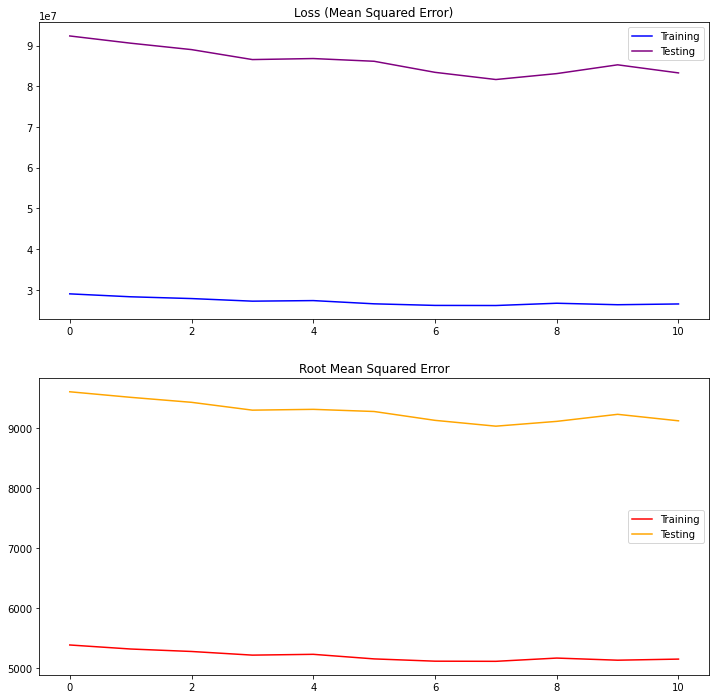

In [85]:
First_Neural_Net_Eval(X_train, X_test)

Epoch 1/100
2018/2018 [==============================] - 8s 4ms/step - loss: 29170432.0000 - root_mean_squared_error: 5400.9658 - val_loss: 93302632.0000 - val_root_mean_squared_error: 9659.3281
Epoch 2/100
2018/2018 [==============================] - 7s 4ms/step - loss: 28921510.0000 - root_mean_squared_error: 5377.8721 - val_loss: 92587768.0000 - val_root_mean_squared_error: 9622.2529
Epoch 3/100
2018/2018 [==============================] - 7s 4ms/step - loss: 28814324.0000 - root_mean_squared_error: 5367.8975 - val_loss: 92283392.0000 - val_root_mean_squared_error: 9606.4238
Epoch 4/100
2018/2018 [==============================] - 7s 4ms/step - loss: 28548234.0000 - root_mean_squared_error: 5343.0532 - val_loss: 91974480.0000 - val_root_mean_squared_error: 9590.3330
Epoch 5/100
2018/2018 [==============================] - 7s 4ms/step - loss: 28130566.0000 - root_mean_squared_error: 5303.8252 - val_loss: 91690488.0000 - val_root_mean_squared_error: 9575.5146
Epoch 6/100
2018/2018 [==

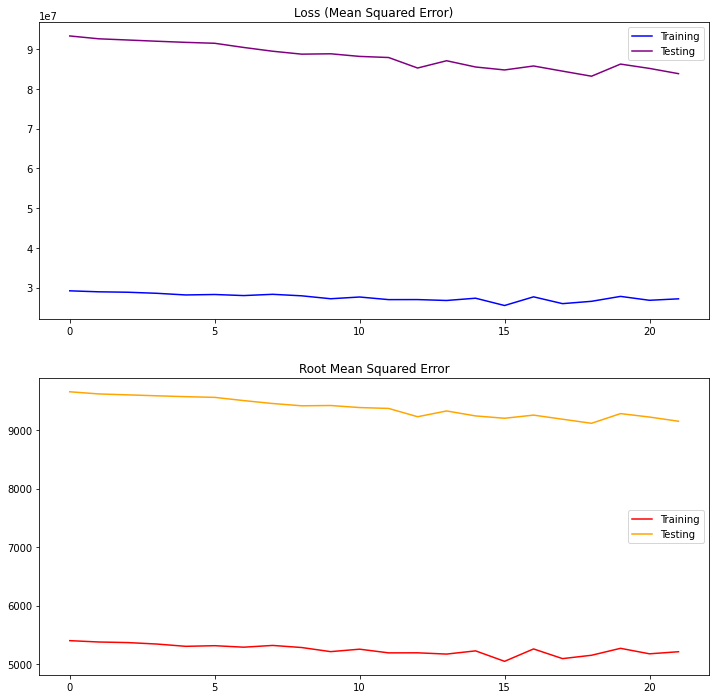

In [86]:
First_Neural_Net_Eval(Z_train, Z_test)

---

## Investigating Fires Over 1 Acre

---

In [87]:
X_train = np.loadtxt('/content/X_train_bigfires.csv', delimiter=',')
X_test = np.loadtxt('/content/X_test_bigfires.csv', delimiter=',')
Z_train = np.loadtxt('/content/Z_train_bigfires.csv', delimiter=',')
Z_test = np.loadtxt('/content/Z_test_bigfires.csv', delimiter=',')
y_train = np.loadtxt('/content/y_train_bigfires.csv', delimiter=',')
y_test = np.loadtxt('/content/y_test_bigfires.csv', delimiter=',')

Epoch 1/100
171/171 [==============================] - 1s 4ms/step - loss: 404155712.0000 - root_mean_squared_error: 20103.6230 - val_loss: 676276416.0000 - val_root_mean_squared_error: 26005.3145
Epoch 2/100
171/171 [==============================] - 1s 4ms/step - loss: 398845568.0000 - root_mean_squared_error: 19971.1172 - val_loss: 653442624.0000 - val_root_mean_squared_error: 25562.5254
Epoch 3/100
171/171 [==============================] - 1s 3ms/step - loss: 384491328.0000 - root_mean_squared_error: 19608.4512 - val_loss: 615077248.0000 - val_root_mean_squared_error: 24800.7500
Epoch 4/100
171/171 [==============================] - 1s 3ms/step - loss: 372164256.0000 - root_mean_squared_error: 19291.5586 - val_loss: 594527360.0000 - val_root_mean_squared_error: 24382.9316
Epoch 5/100
171/171 [==============================] - 1s 3ms/step - loss: 360473088.0000 - root_mean_squared_error: 18986.1289 - val_loss: 581701312.0000 - val_root_mean_squared_error: 24118.4824
Epoch 6/100
171

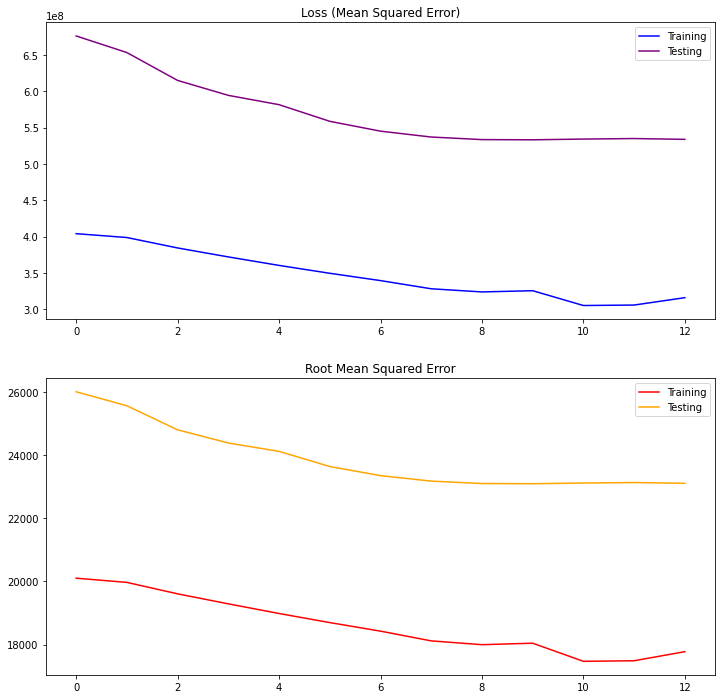

In [88]:
First_Neural_Net_Eval(X_train, X_test)

Epoch 1/100
171/171 [==============================] - 1s 4ms/step - loss: 404236736.0000 - root_mean_squared_error: 20105.6367 - val_loss: 676876224.0000 - val_root_mean_squared_error: 26016.8438
Epoch 2/100
171/171 [==============================] - 1s 4ms/step - loss: 398463872.0000 - root_mean_squared_error: 19961.5605 - val_loss: 649172608.0000 - val_root_mean_squared_error: 25478.8652
Epoch 3/100
171/171 [==============================] - 1s 3ms/step - loss: 382992032.0000 - root_mean_squared_error: 19570.1797 - val_loss: 604663104.0000 - val_root_mean_squared_error: 24589.8984
Epoch 4/100
171/171 [==============================] - 1s 3ms/step - loss: 366315936.0000 - root_mean_squared_error: 19139.3789 - val_loss: 576049920.0000 - val_root_mean_squared_error: 24001.0391
Epoch 5/100
171/171 [==============================] - 1s 4ms/step - loss: 353008928.0000 - root_mean_squared_error: 18788.5312 - val_loss: 551758784.0000 - val_root_mean_squared_error: 23489.5469
Epoch 6/100
171

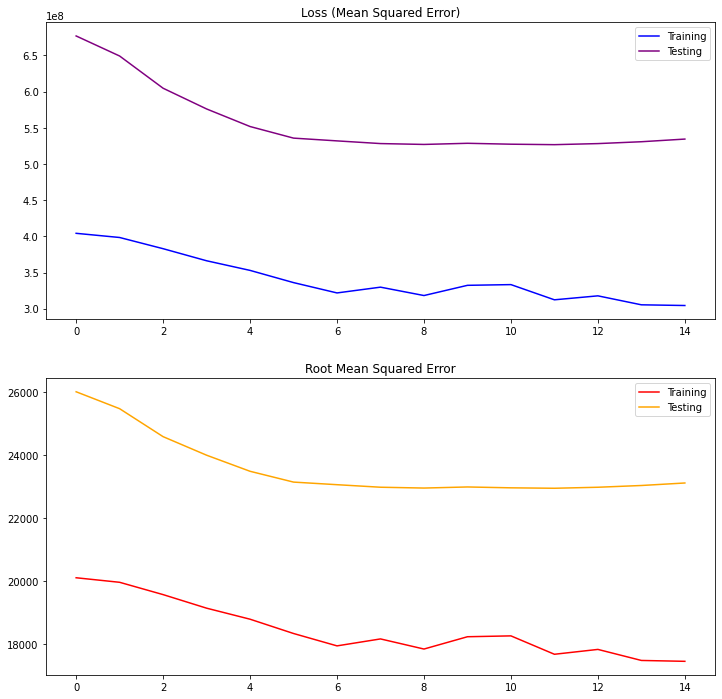

In [89]:
First_Neural_Net_Eval(Z_train, Z_test)

---

## Investigating Fires Over 1 Acre but Removing Outliers

---

In [5]:
X_train = np.loadtxt('/content/X_train_without_outliers.csv', delimiter=',')
X_test = np.loadtxt('/content/X_test_without_outliers.csv', delimiter=',')
Z_train = np.loadtxt('/content/Z_train_without_outliers.csv', delimiter=',')
Z_test = np.loadtxt('/content/Z_test_without_outliers.csv', delimiter=',')
y_train = np.loadtxt('/content/y_train_without_outliers.csv', delimiter=',')
y_test = np.loadtxt('/content/y_test_without_outliers.csv', delimiter=',')

Epoch 1/100
40/40 [==============================] - 1s 7ms/step - loss: 6341.1772 - root_mean_squared_error: 79.6051 - val_loss: 4073.6189 - val_root_mean_squared_error: 63.7914
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 5373.5923 - root_mean_squared_error: 73.2749 - val_loss: 3529.0991 - val_root_mean_squared_error: 59.3691
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 5028.6914 - root_mean_squared_error: 70.8822 - val_loss: 3513.0913 - val_root_mean_squared_error: 59.2341
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 5054.3262 - root_mean_squared_error: 71.0627 - val_loss: 3465.7852 - val_root_mean_squared_error: 58.8337
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 5069.0566 - root_mean_squared_error: 71.1666 - val_loss: 3464.9211 - val_root_mean_squared_error: 58.8262
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 4878.3618 - root_mean_squared_er

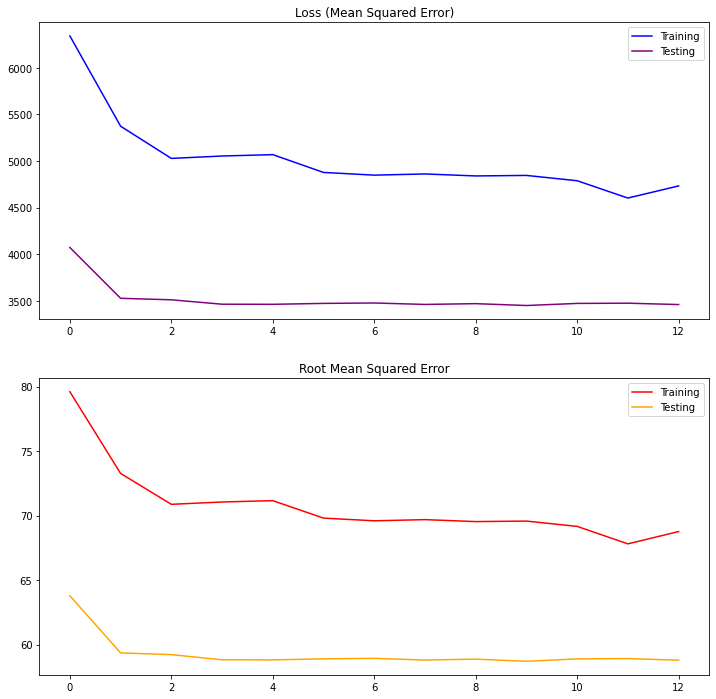

In [91]:
First_Neural_Net_Eval(X_train, X_test)

Epoch 1/100
40/40 [==============================] - 3s 8ms/step - loss: 6024.5454 - root_mean_squared_error: 77.5627 - val_loss: 3815.6973 - val_root_mean_squared_error: 61.7017
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 5632.1929 - root_mean_squared_error: 74.9906 - val_loss: 3763.8584 - val_root_mean_squared_error: 61.2803
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 5104.0366 - root_mean_squared_error: 71.3824 - val_loss: 3743.7961 - val_root_mean_squared_error: 61.1163
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 4862.2388 - root_mean_squared_error: 69.6681 - val_loss: 3750.9067 - val_root_mean_squared_error: 61.1744
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 5009.1084 - root_mean_squared_error: 70.7143 - val_loss: 3739.4358 - val_root_mean_squared_error: 61.0806
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 4937.7759 - root_mean_squared_er

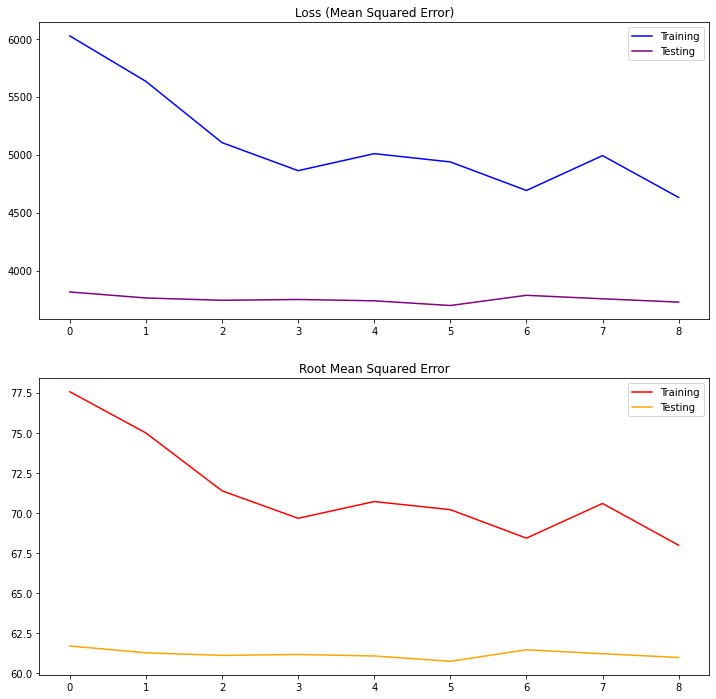

In [11]:
First_Neural_Net_Eval(Z_train, Z_test)